<a href="https://colab.research.google.com/github/SophieShin/Python/blob/main/ToyPJ_KOSPI200_Intraday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
data = '/content/___200_260206.csv'

In [18]:
df['TRD_TM'] = pd.to_datetime(df['TRD_DDTM'])
df = df.sort_values('TRD_TM')
df = df.set_index('TRD_TM')

/tmp/ipython-input-2014871036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRD_TM'] = pd.to_datetime(df['TRD_DDTM'])


In [20]:
df.head()

,TRD_DDTM,IDX_ID,TM_ACC_TRDCNT,TM_ACC_TRDVOL,TM_ACC_TRDVAL,ACC_TRDCNT,ACC_TRDVOL,ACC_TRDVAL,MKTCAP,PRSNT_IDX,...,DN_ISU_CNT,UPLMTPRC_ISU_CNT,LWLMTPRC_ISU_CNT,BIASQUOT_UP_ISU_CNT,BIASQUOT_DN_ISU_CNT,BIASQUOT_UPLMTPRC_ISU_CNT,BIASQUOT_LWLMTPRC_ISU_CNT,FLUC_TP_CD,PREVDD_IDX,time
TRD_TM,,,,,,,,,,,,,,,,,,,,,
2026-02-06 09:00:00,20260206090000,K2G01P,132,"2,247","300,395,215",132,"2,247","300,395,215","3,897,339,815,860,690",757,...,0,0,0,0,0,0,0,3,757,090000
2026-02-06 09:00:01,20260206090001,K2G01P,0,"24,676","2,223,307,600",132,"26,923","2,523,702,815","3,897,339,815,860,690",757,...,0,0,0,0,0,0,0,2,757,090001
2026-02-06 09:00:02,20260206090002,K2G01P,156,"72,186","17,642,228,500",288,"99,109","20,165,931,315","3,897,238,996,607,890",756,...,1,0,0,0,0,0,0,2,757,090002
2026-02-06 09:00:03,20260206090003,K2G01P,515,"24,522","2,155,416,950",803,"123,631","22,321,348,265","3,895,558,416,580,690",756,...,4,0,0,0,0,0,0,2,757,090003
2026-02-06 09:00:04,20260206090004,K2G01P,0,"71,260","7,417,059,220",803,"194,891","29,738,407,485","3,895,558,416,580,690",755,...,4,0,0,0,0,0,0,2,757,090004


In [39]:
df['PRSNT_IDX']

,PRSNT_IDX
TRD_TM,
2026-02-06 09:00:00,757
2026-02-06 09:00:01,757
2026-02-06 09:00:02,756
2026-02-06 09:00:03,756
2026-02-06 09:00:04,755
...,...
2026-02-06 15:30:26,748
2026-02-06 15:30:27,748
2026-02-06 15:30:28,748


In [21]:
df['TM_ACC_TRDVOL'] = df['TM_ACC_TRDVOL'].str.replace(',', '').astype(float)


In [36]:
df_10M = df.resample('10T').agg({
    'TM_ACC_TRDVOL': 'sum'   # 거래량 합계
})

df_10M.head()

/tmp/ipython-input-210672095.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_10M = df.resample('10T').agg({


,TM_ACC_TRDVOL
TRD_TM,
2026-02-06 09:00:00,24262020.0
2026-02-06 09:10:00,16430361.0
2026-02-06 09:20:00,11007500.0
2026-02-06 09:30:00,9899511.0
2026-02-06 09:40:00,8181596.0


In [38]:
df_10M.tail()

,TM_ACC_TRDVOL
TRD_TM,
2026-02-06 14:50:00,5538231.0
2026-02-06 15:00:00,5052117.0
2026-02-06 15:10:00,5491466.0
2026-02-06 15:20:00,6914.0
2026-02-06 15:30:00,6950372.0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

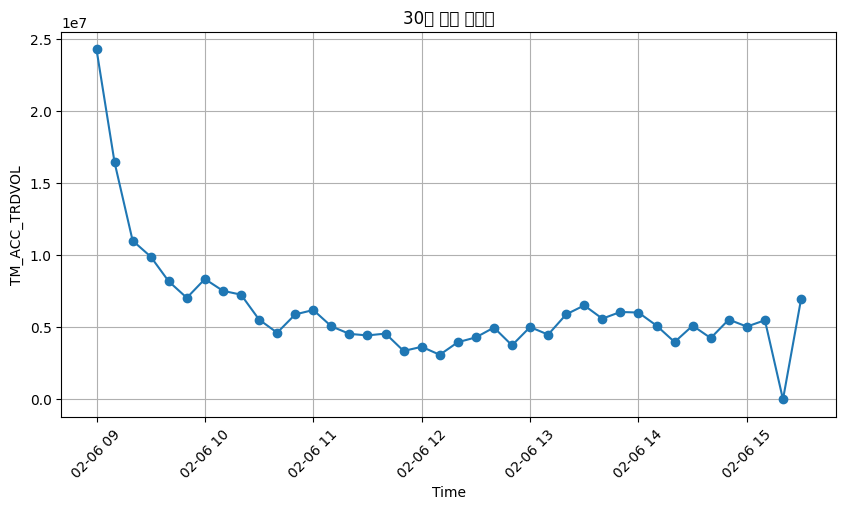

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_10M.index, df_10M['TM_ACC_TRDVOL'], marker='o')
plt.title('30초 단위 거래량')
plt.xlabel('Time')
plt.ylabel('TM_ACC_TRDVOL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [47]:
import numpy as np

In [51]:
df['log_return_60s'] = np.log(df['PRSNT_IDX'] / df['PRSNT_IDX'].shift(60))
df['log_return_60s']


,log_return_60s
TRD_TM,
2026-02-06 09:00:00,NaN
2026-02-06 09:00:01,NaN
2026-02-06 09:00:02,NaN
2026-02-06 09:00:03,NaN
2026-02-06 09:00:04,NaN
...,...
2026-02-06 15:30:26,0.0
2026-02-06 15:30:27,0.0
2026-02-06 15:30:28,0.0


In [55]:
df['log_return_5m'] = np.log(df['PRSNT_IDX'] / df['PRSNT_IDX'].shift(300))
df['log_return_10m'] = np.log(df['PRSNT_IDX'] / df['PRSNT_IDX'].shift(600))
df['log_return_10m']

,log_return_10m
TRD_TM,
2026-02-06 09:00:00,NaN
2026-02-06 09:00:01,NaN
2026-02-06 09:00:02,NaN
2026-02-06 09:00:03,NaN
2026-02-06 09:00:04,NaN
...,...
2026-02-06 15:30:26,0.0
2026-02-06 15:30:27,0.0
2026-02-06 15:30:28,0.0


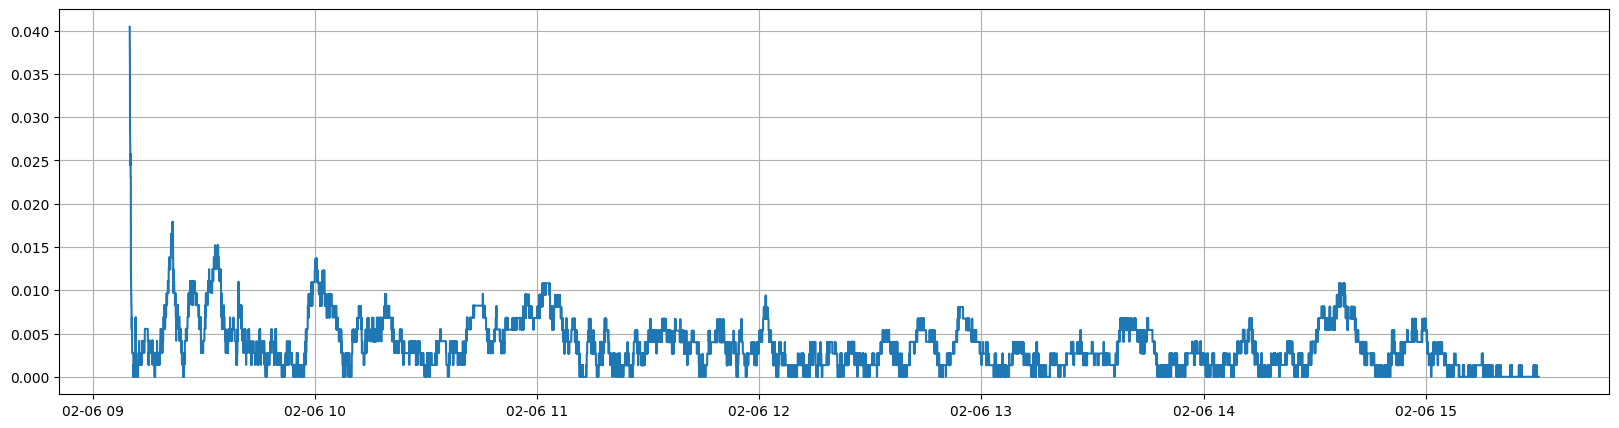

In [64]:

plt.figure(figsize=(20, 5))
plt.plot(df['log_return_10m'].abs())

plt.grid(True)
plt.show()

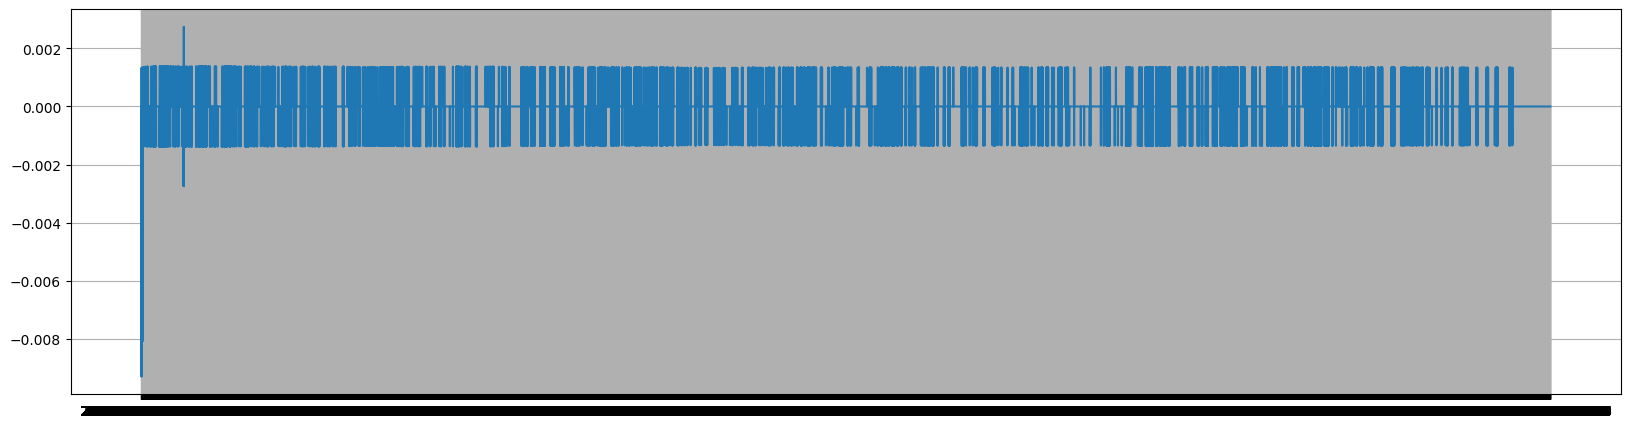

In [78]:
plt.figure(figsize=(20, 5))
plt.plot(df['log_return'])

plt.grid(True)
plt.show()

In [69]:
df['log_return'] = np.log(df['PRSNT_IDX'] / df['PRSNT_IDX'].shift(1))
df_return = df['log_return']
df_return


,log_return
TRD_DDTM,
20260206090000,NaN
20260206090001,0.000000
20260206090002,-0.001322
20260206090003,0.000000
20260206090004,-0.001324
...,...
20260206153026,0.000000
20260206153027,0.000000
20260206153028,0.000000


In [72]:
df_return = df_return.dropna()  # NaN 제거


In [74]:
df_return.index

Index(['20260206090001', '20260206090002', '20260206090003', '20260206090004',
       '20260206090005', '20260206090006', '20260206090007', '20260206090008',
       '20260206090009', '20260206090010',
       ...
       '20260206153021', '20260206153022', '20260206153023', '20260206153024',
       '20260206153025', '20260206153026', '20260206153027', '20260206153028',
       '20260206153029', '20260206153030'],
      dtype='object', name='TRD_DDTM', length=23430)

In [75]:
df_return.index = pd.to_datetime(df_return.index)
rv_5min = df_return.resample('5T').apply(lambda x: (x**2).sum())

/tmp/ipython-input-2239693082.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rv_5min = df_return.resample('5T').apply(lambda x: (x**2).sum())


In [76]:
rv_5min

,log_return
TRD_DDTM,
2026-02-06 09:00:00,0.000257
2026-02-06 09:05:00,0.000094
2026-02-06 09:10:00,0.000087
2026-02-06 09:15:00,0.000069
2026-02-06 09:20:00,0.000056
...,...
2026-02-06 15:10:00,0.000039
2026-02-06 15:15:00,0.000055
2026-02-06 15:20:00,0.000002


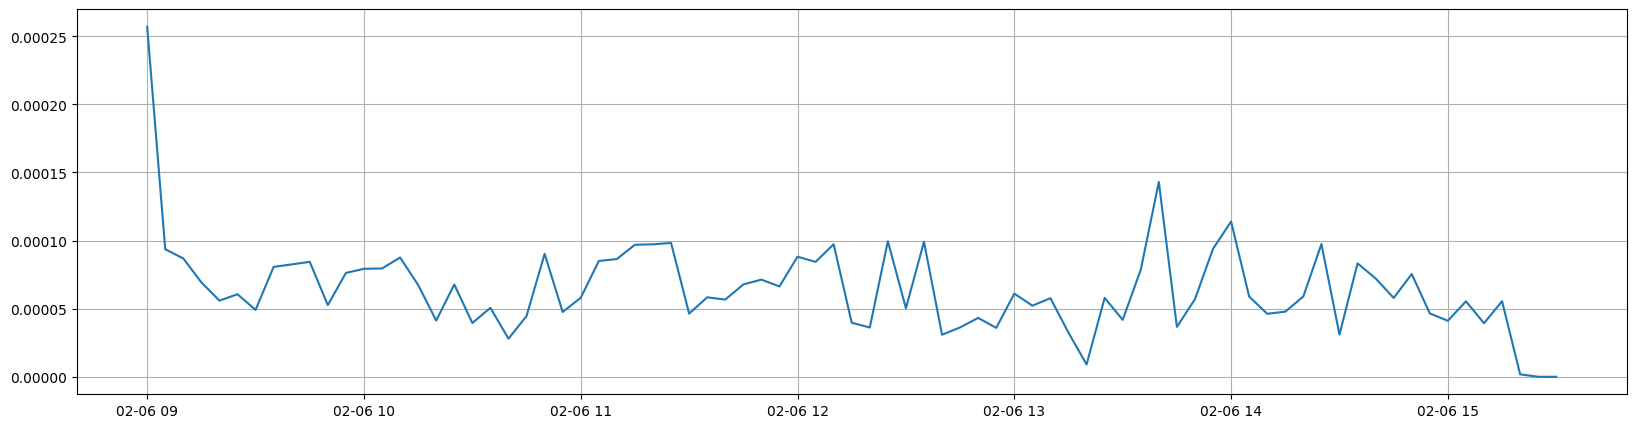

In [77]:
plt.figure(figsize=(20, 5))
plt.plot(rv_5min)

plt.grid(True)
plt.show()